<div style="margin: 0 auto; text-align: center; width: 500px;">
    <h1><font color='#7985E0'>Tugas 03</font><font color='#F29496'> Pemrosesan Citra Digital</font></h1>
<div>

<div>
    <div style="margin: 0 auto; text-align: center; width: 500px;">
        <img src="https://drive.google.com/uc?id=1Y2Qa88dTnR80uhwDQ-qyMc3wye9CcMdx" alt="foto" style="width:250px; height:250px"><br>
        <b>
            <font color="#7985E0">
                Iman Mustika Ismail<br>
                H071201050<br>
                Pemrosesan Citra Digital - B
            </font></b>
    </div>
</div>

---
<div class="alert alert-block alert-info">
    <h2>Table of Contents<a class="anchor" id="tableOfContentss"></a></h2>
    <ul>
        <li><a href="#librari">Library</a></li>
        <li><a href="#number1">No. 1</a></li>
        <li><a href="#number2">No. 2</a></li>
        <li><a href="#number3">No. 3</a></li>
        <li><a href="#number4">No. 4</a></li>
    </ul>
</div>

## Library<a class="anchor" id="librari"></a>
---

In [14]:
# Importing library
import numpy as np
import math
from sklearn import cluster
from skimage import feature
from skimage.io import imread
from skimage.color import rgb2gray, rgb2yiq
from skimage.filters import threshold_otsu
from skimage.transform import resize
from scipy import ndimage
import cv2 as cv
import matplotlib.pylab as pylab

import warnings 
warnings.filterwarnings('ignore')

## Nomor 1 <a class="anchor" id="number1"></a>
---

1. Diberikan citra **girl-warna.bmp**, tampilkan hasil transformasi citra tersebut ke model warna:<br>
    a. YCbCr

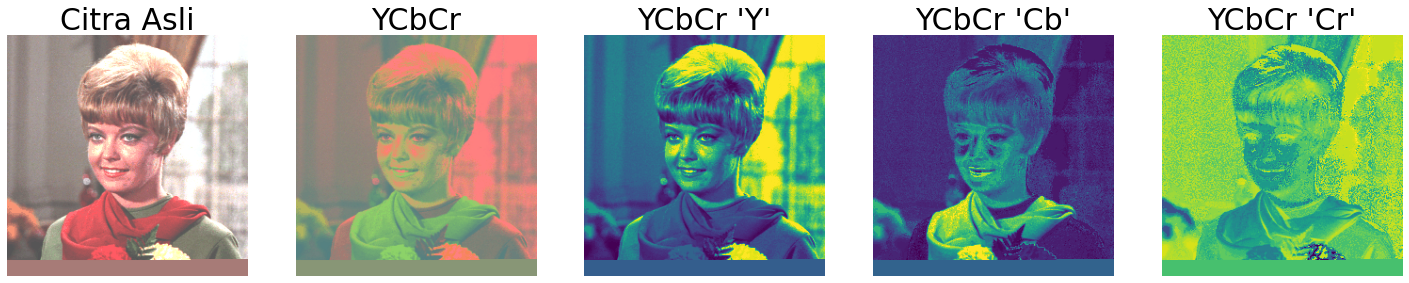

In [15]:
# Read image
img_girlWarna = cv.cvtColor(cv.imread('girl-warna.bmp'), cv.COLOR_BGR2RGB)

# Transform YCbCr
img_girlWarna_YCbCr = cv.cvtColor(cv.imread('girl-warna.bmp'), cv.COLOR_BGR2YCrCb)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(151)
pylab.imshow(img_girlWarna)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(152)
pylab.imshow(img_girlWarna_YCbCr)
pylab.axis('off')
pylab.title('YCbCr', fontsize=30)
pylab.subplot(153)
pylab.imshow(img_girlWarna_YCbCr[...,0])
pylab.axis('off')
pylab.title('YCbCr \'Y\'', fontsize=30)
pylab.subplot(154)
pylab.imshow(img_girlWarna_YCbCr[...,1])
pylab.axis('off')
pylab.title('YCbCr \'Cb\'', fontsize=30)
pylab.subplot(155)
pylab.imshow(img_girlWarna_YCbCr[...,2])
pylab.axis('off')
pylab.title('YCbCr \'Cr\'', fontsize=30)
pylab.show()

    b. HSI

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


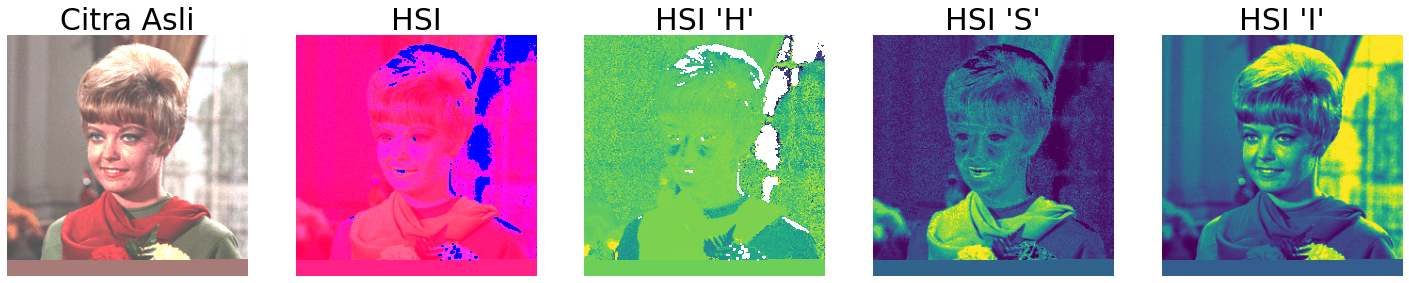

In [16]:
def RGB_TO_HSI(img):
    with np.errstate(divide='ignore', invalid='ignore'):
        # Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255
        
        # Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        # Calculate Intensity (I)
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        # Calculate Saturation (S)
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)
            return saturation

        # Calculate Hue (H)
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])
                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]
            return hue

        # merge channel into image
        hsi = cv.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

# Transform HSI
img_girlWarna_HSI = RGB_TO_HSI(img_girlWarna)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(151)
pylab.imshow(img_girlWarna)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(152)
pylab.imshow(img_girlWarna_HSI)
pylab.axis('off')
pylab.title('HSI', fontsize=30)
pylab.subplot(153)
pylab.imshow(img_girlWarna_HSI[...,0])
pylab.axis('off')
pylab.title('HSI \'H\'', fontsize=30)
pylab.subplot(154)
pylab.imshow(img_girlWarna_HSI[...,1])
pylab.axis('off')
pylab.title('HSI \'S\'', fontsize=30)
pylab.subplot(155)
pylab.imshow(img_girlWarna_HSI[...,2])
pylab.axis('off')
pylab.title('HSI \'I\'', fontsize=30)
pylab.show()

    c. YIQ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


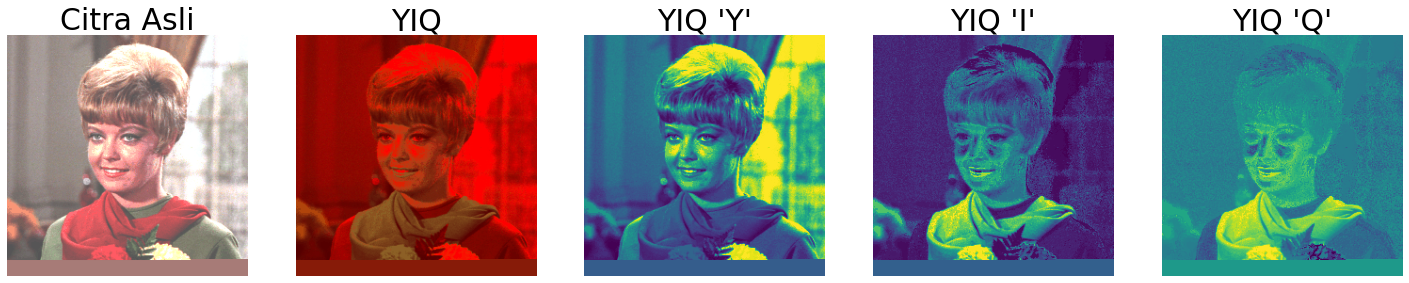

In [17]:
# Transform HSV
img_girlWarna_YIQ = rgb2yiq(img_girlWarna)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(151)
pylab.imshow(img_girlWarna)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(152)
pylab.imshow(img_girlWarna_YIQ)
pylab.axis('off')
pylab.title('YIQ', fontsize=30)
pylab.subplot(153)
pylab.imshow(img_girlWarna_YIQ[...,0])
pylab.axis('off')
pylab.title('YIQ \'Y\'', fontsize=30)
pylab.subplot(154)
pylab.imshow(img_girlWarna_YIQ[...,1])
pylab.axis('off')
pylab.title('YIQ \'I\'', fontsize=30)
pylab.subplot(155)
pylab.imshow(img_girlWarna_YIQ[...,2])
pylab.axis('off')
pylab.title('YIQ \'Q\'', fontsize=30)
pylab.show()

    d. YUV

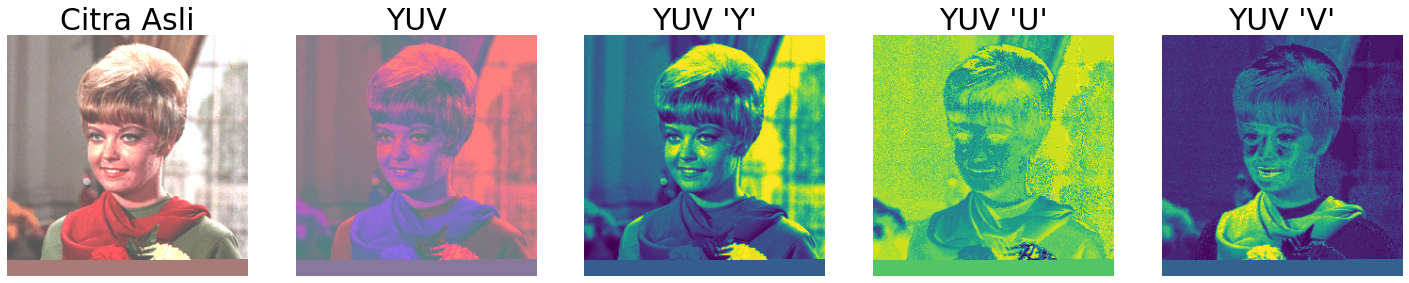

In [18]:
# Transform HSV
img_girlWarna_YUV = cv.cvtColor(cv.imread('girl-warna.bmp'), cv.COLOR_BGR2YUV)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(151)
pylab.imshow(img_girlWarna)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(152)
pylab.imshow(img_girlWarna_YUV)
pylab.axis('off')
pylab.title('YUV', fontsize=30)
pylab.subplot(153)
pylab.imshow(img_girlWarna_YUV[...,0])
pylab.axis('off')
pylab.title('YUV \'Y\'', fontsize=30)
pylab.subplot(154)
pylab.imshow(img_girlWarna_YUV[...,1])
pylab.axis('off')
pylab.title('YUV \'U\'', fontsize=30)
pylab.subplot(155)
pylab.imshow(img_girlWarna_YUV[...,2])
pylab.axis('off')
pylab.title('YUV \'V\'', fontsize=30)
pylab.show()

## Nomor 2<a class="anchor" id="number2"></a>
---

2. Tentukan nilai _threshold_ dengan metode _otsu_ dari citra **mountain.bmp** dan tampilkan _threshold_-nya.

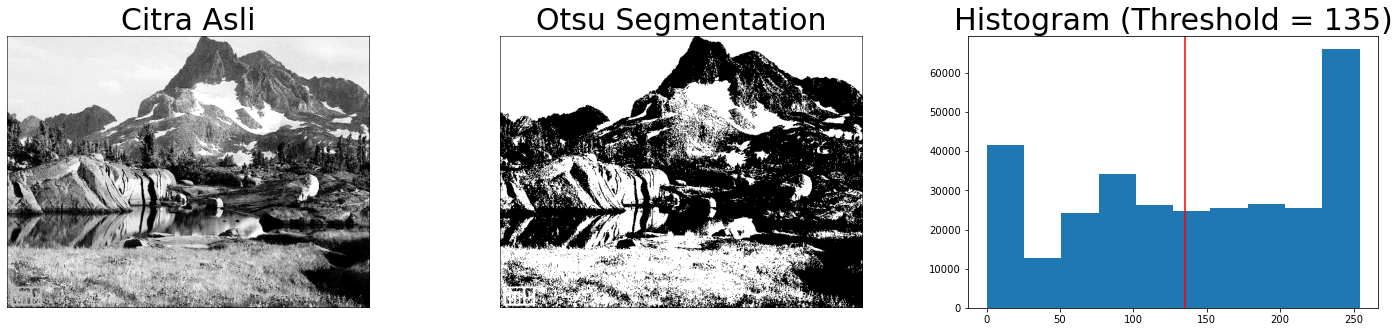

In [19]:
# Read image
img_mountain = rgb2gray(imread('mountain.bmp'))

# Image segmentation using Otsu Thresholding
otsu_thresh = threshold_otsu(img_mountain)
img_mountain_otsu = img_mountain > otsu_thresh
counts, bins = np.histogram(img_mountain)

# Displaying image
pylab.figure(figsize=(25,5))
pylab.subplot(131)
pylab.imshow(img_mountain, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(132)
pylab.imshow(img_mountain_otsu, cmap='gray')
pylab.axis('off')
pylab.title('Otsu Segmentation', fontsize=30)
pylab.subplot(133)
pylab.hist(bins[:-1], bins, weights=counts)
pylab.axvline(otsu_thresh, color='r')
pylab.title('Histogram (Threshold = ' + str(otsu_thresh) + ')', fontsize=30)
pylab.show()

## Nomor 3<a class="anchor" id="number3"></a>
---

3. Dengan menggunakan segmentasi dan proses citra biner, proses citra **coints.png** sehingga seluruh _background_ menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra tersebut.

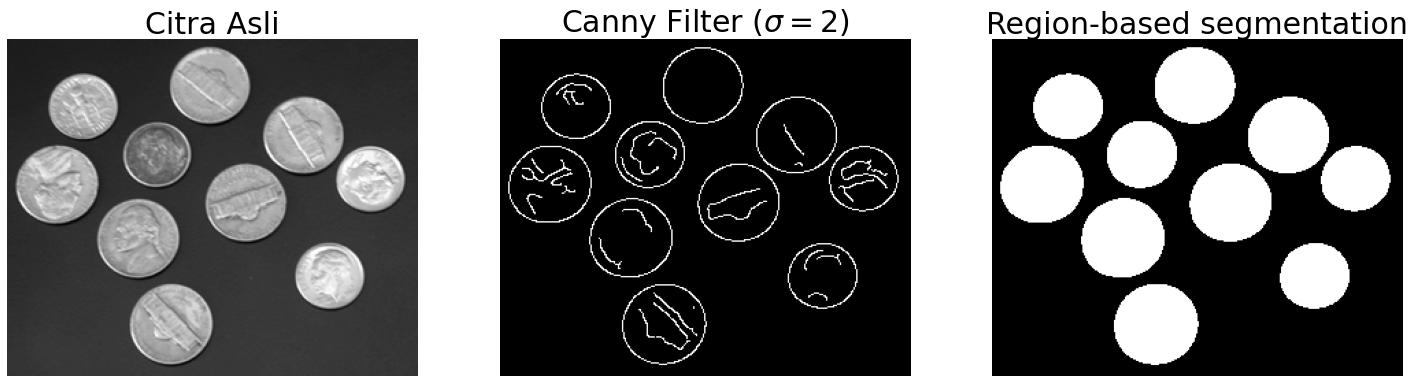

In [20]:
# Read image
img_coints = rgb2gray(imread('coints.png'))

# Canny Filter
img_coints_canny = feature.canny(img_coints, sigma=2)

# region-based segmentation
img_coints_segment = ndimage.binary_fill_holes(img_coints_canny)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(131)
pylab.imshow(img_coints, cmap='gray')
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(132)
pylab.imshow(img_coints_canny, cmap='gray')
pylab.axis('off')
pylab.title('Canny Filter (' + r'$\sigma = 2$' + ')', fontsize=30)
pylab.subplot(133)
pylab.imshow(img_coints_segment, cmap='gray')
pylab.axis('off')
pylab.title('Region-based segmentation', fontsize=30)
pylab.show()

## Nomor 4<a class="anchor" id="number4"></a>
---

4. Segmentasi citra **peppers.tiff** menggunakan _K-Mean_ dengan nilai $K = 3$ berdasarkan warna.

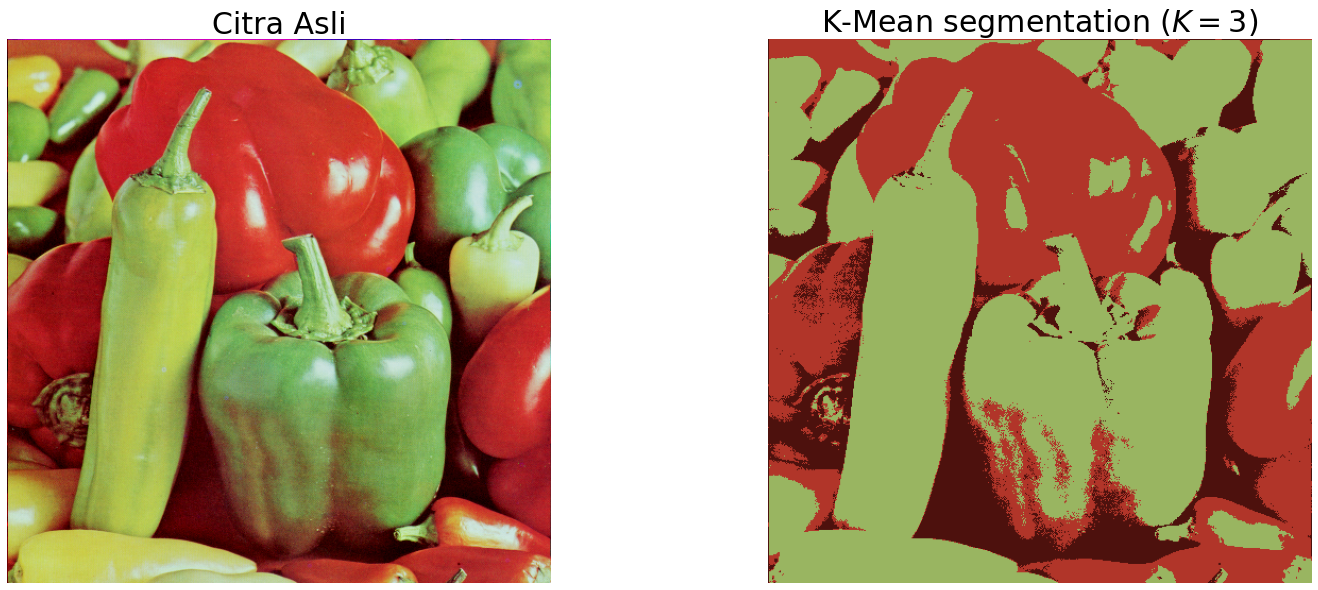

In [21]:
# Read image
img_peppers = cv.cvtColor(cv.imread('peppers.tiff'), cv.COLOR_BGR2RGB)
img_peppers_reshape = np.float32(img_peppers.reshape((-1, 3)))

# Image segmentation using K-means with K = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, (centers) = cv.kmeans(img_peppers_reshape, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

img_peppers_segmented = centers[labels.flatten()]
img_peppers_segmented = img_peppers_segmented.reshape(img_peppers.shape)

# Displaying image
pylab.figure(figsize=(25,10))
pylab.subplot(121)
pylab.imshow(img_peppers)
pylab.axis('off')
pylab.title('Citra Asli', fontsize=30)
pylab.subplot(122)
pylab.imshow(img_peppers_segmented)
pylab.axis('off')
pylab.title('K-Mean segmentation (' + r'$K=3$' +')', fontsize=30)
pylab.show()

<div style=" text-align: center; margin-top: 50px;">
    <a class="button" 
       href="#tableOfContentss" 
       style="border: none; 
          background-color: inherit;
          padding: 7px 14px;
          font-size: 16px;
          border-radius: 11px;
          cursor: pointer;
          display: inline-block;
          background-color: dodgerblue;
          color: white;">
        Kembali ke "Table of Contents"
    </a><br>
    <h5 style="color:gray;
               margin-top: 30px;">
        Iman Mustika Ismail ©2022
    </h5>
</div>